In [1]:
from rasters import Raster

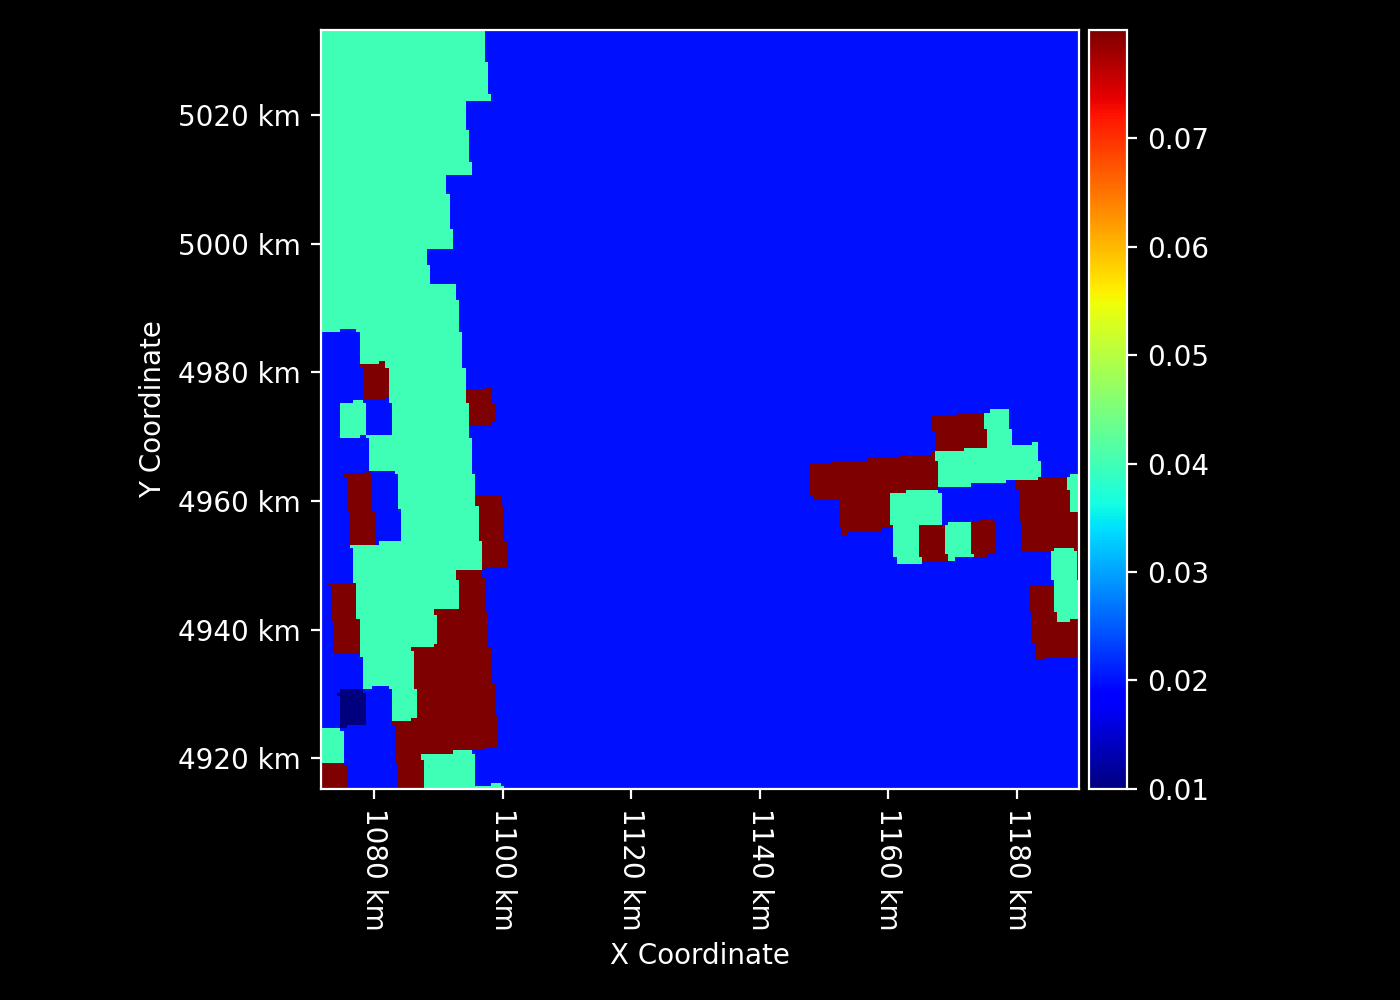

In [2]:
gl_sh_500m = Raster.open("gl_sh_500m.tif")
gl_sh_500m

In [3]:
geometry_500m = gl_sh_500m.geometry
geometry_500m

{
  "dimensions": {
    "rows": 236,
    "cols": 236
  },
  "bbox": {
    "xmin": 1071674.002937042,
    "ymin": 4915252.152966607,
    "xmax": 1189674.002937042,
    "ymax": 5033252.152966607
  },
  "crs": "EPSG:32609",
  "resolution": {
    "cell_width": 500.0,
    "cell_height": -500.0
  }
}

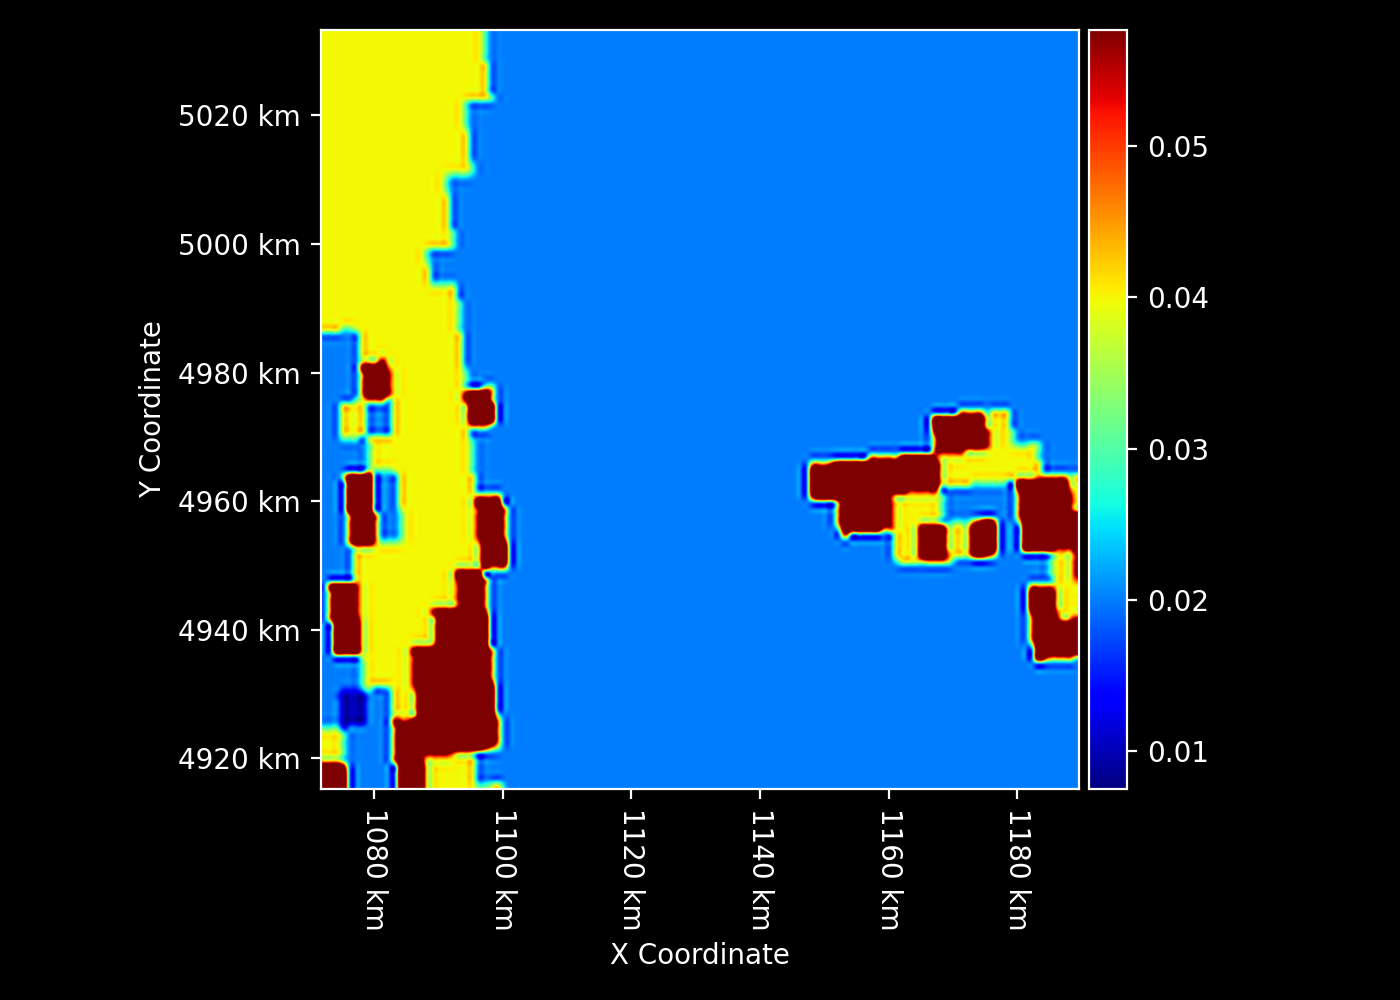

In [16]:
gl_sh_500m.to_grid(geometry_500m.UTM(1000), resampling="average").to_geometry(geometry_70m, resampling="lanczos")

In [4]:
geometry_70m = geometry_500m.UTM(70)
geometry_70m

{
  "dimensions": {
    "rows": 1685,
    "cols": 1685
  },
  "bbox": {
    "xmin": 1071674.002937042,
    "ymin": 4915302.152966607,
    "xmax": 1189624.002937042,
    "ymax": 5033252.152966607
  },
  "crs": "EPSG:32609",
  "resolution": {
    "cell_width": 70.0,
    "cell_height": -70.0
  }
}

In [5]:
import numpy as np
np.dtype(gl_sh_500m)

dtype('float32')

In [6]:
gl_sh_500m.nodata

nan

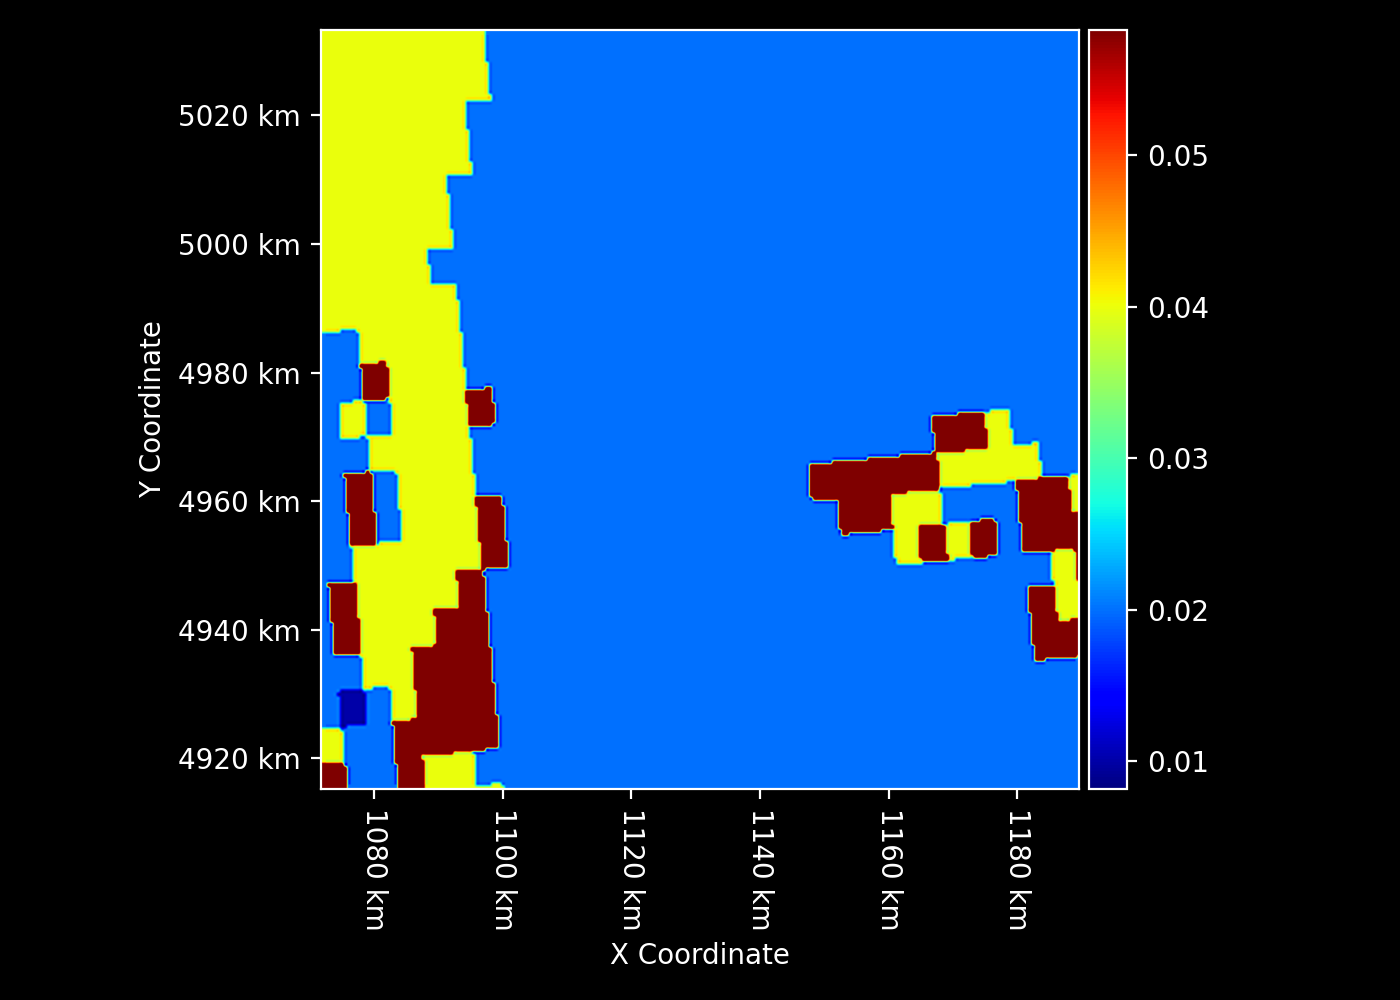

In [7]:
gl_sh_500m.to_grid(geometry_70m, resampling="cubic")

In [8]:
# Check nodata handling and value distribution in the resampled output
resampled = gl_sh_500m.to_grid(geometry_70m, resampling="cubic")
print("Nodata value:", resampled.nodata)
print("Unique values:", np.unique(resampled.array))
print("Count of NaN:", np.isnan(resampled.array).sum())
print("Min/Max:", np.nanmin(resampled.array), np.nanmax(resampled.array))

Nodata value: nan
Unique values: [0.00818582 0.00819968 0.00827772 ... 0.0914406  0.09145465 0.09152418]
Count of NaN: 0
Min/Max: 0.00818582 0.09152418
